# Logistic Regression

Logistic Regression is a *supervised learning* algorithm mostly used for **binary classification** tasks.

It predicts the **probability** that an input belongs to a particular class. 

### How does it work?

First, the model  computes a **linear combination** of input features

$$
z = w_{1}x_{1} + w_{2}x_{2} + ... + w_{n}x_{n} = w^Tx + b
$$

where:

*   $w$ is the vector of weights (or coefficients) for each feature,

*   $x$ is the input feature vector, and

*   $b$ is the bias term, this term accounts for the variance that is not captured by the model.

The linear combination $z$ is then passed through the sigmoid (logistic) function to obtain a probability $\hat{y}$:

$$
\hat{y} = \sigma(z) = \frac{1}{1 + e^{-z}}
$$

The sigmoid function 'squashes' $z$ to a range between 0 and 1, representing the probability that the input belongs to the positive class.

Once the probability is computed, it is typically compared against a *threshold* to make a binary decision

### Model training

To train the model, logistic regression uses a loss function (In ML, a loss function measures the difference between the predicted values and the true target values) called the **log loss** (or binary cross-entropy loss).

For an entire dataset with examples we have the **cost function** (average log loss),  which is minimized during training

   Feature1  Feature2  Target
0  0.958509 -1.504388       0
1  0.868559 -1.855987       0
2  1.780085  1.484538       1
3  1.120084 -1.536818       0
4  1.284142 -1.381998       0


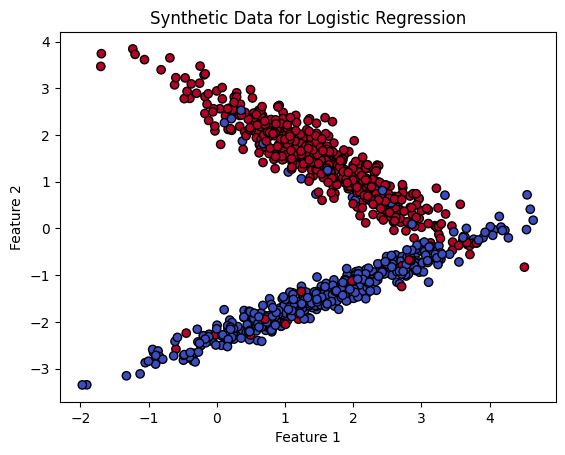

In [1]:
# Let's generate some synthetic data

import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, flip_y=0.1, class_sep=1.5, random_state=42)

# Convert to DataFrame for easy manipulation
data = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
data['Target'] = y

# Display the first few rows
print(data.head())

# Optional: Visualize the data
plt.scatter(data['Feature1'], data['Feature2'], c=data['Target'], cmap='coolwarm', edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Data for Logistic Regression')
plt.show()

Implementing the algorithm involves these steps:

1. Splitting the dataset into training and testing sets.

2. Initializing and training the Logistic Regression classifier.

3. Making predictions and evaluating the model's performance.

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split the data into training and testing sets
X = data[['Feature1', 'Feature2']]
y = data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
# Initialize and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [6]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [7]:
# Display the results
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.94


The accuracy_score function computes the **proportion of correct predictions**, which is defined as:

$$
Accuracy = \frac{Number of correct predictions}{Total number of predictions}
$$

which gives a quick measure of how well the model performs on the test set.

In this case an accuracy score of .94 means that the the model correctly predicted the class 94% of the times.  

While it is a useful measure, it may not always be the best metric, especially in cases where the dataset is imbalanced (e.g., one class is much more frequent than the other). In such cases other metrics may give a clearer picture of the model’s performance.

In [8]:
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[129   7]
 [ 11 153]]


The confusion matrix is a table in which information regarding the predicted class labels and the true class labels is displayed and provides insight into how well the model is performing and where it might be making errors.

For a binary classification problem, the confusion matrix has four component: the true labels are in the matrix rows, and the predicted labels, on the columns. 

The diagonal elements on this matrix contains those observations in which the predicted and the true label are the same: the first element in the diagonal correspond to those instances in which the predicted label and the true label are positive (TP), and the second element in the diagonal correspond to those in which both labels are false (TN). These are the cases in which the model correctly predicted the labels.

The elements outside the diagonal correspond to those cases in which the predicted and the true label are not the same, for instance the predicted label is negative but the true label is positive (FN) or that the predicted label is positive but the true label is negative (FP)

In [9]:
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       136
           1       0.96      0.93      0.94       164

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



With the elements of the confusion matrix (TP, TN, FN, FP) it is possible to calculate new metrics like *precision*, *recall* and the *f1-score* which in some cases provide a better understanding of the model's performance.